# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [69]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

In [70]:
tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_2019.csv', encoding = "ISO-8859-1", sep = ';')

y = pd.DataFrame(tabela)

# Dados faltando
y = y.drop("DESC_CICLO_ENSINO", axis=1)
y = y.drop("DESC_TIPO_PROGRAMA", axis=1)
y = y.drop("CD_PARECER_CONCL_FIN", axis=1)
y = y.drop("DESC_PARECER_CONCL_FIN", axis=1)

# Não consta no dicionário de variáveis
y = y.drop("DUR_DIA_HORA", axis=1)
y = y.drop("DUR_DIA_MIN", axis=1)
# y = y.drop("X_SEMANA", axis=1)

y["DUR_DIA_TURMA"] = pd.to_numeric(y["DUR_DIA_TURMA"], errors="coerce")

y = y.dropna(how="any", axis=0)
y = y.drop_duplicates(subset='CD_INEP_ESCOLA')

y.to_csv('data/Matriculas_2019.csv', sep=';', index=False, line_terminator="" )

In [71]:
tabela = pd.read_csv('data/Matriculas_2019.csv', encoding = "ISO-8859-1", sep = ';')

y = pd.DataFrame(tabela)

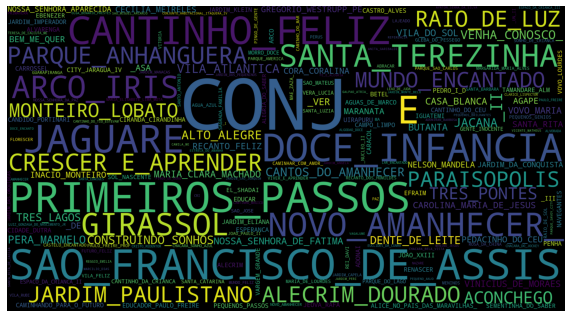

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = y['NOME_ESCOLA'].str.replace(',', '').str.replace(' ', '_').str.cat(sep=' ')
# print(text)
wordcloud = WordCloud(background_color="black",
                      width=1980, height=1080).generate(text)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("summary_wordcloud.png")

In [73]:
import plotly.graph_objects as go
import numpy as np

situacao = pd.DataFrame(columns=['Situacao', 'Quantidade'])

columns = ['SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

for idx, label in enumerate(labels):
    situacao.loc[idx] = list([label, np.sum(y[columns[idx]])])

fig = go.Figure(data=[go.Pie(labels=situacao['Situacao'], values=situacao['Quantidade'], hole=.3)])
fig.show()

In [74]:
columns = ['NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Não possui']
doencaAluno = []

for label in columns:
    doencaAluno.append(np.sum(y[label]))

fig = go.Figure(data=[go.Pie(labels=labels, values=doencaAluno)])
fig.show()
